<a href="https://colab.research.google.com/github/casjunior93/projeto-integrador-iv/blob/main/PI_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas fundamentais

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

#Semente aleatória do Numpy
np.random.seed(42)

#Data local
import locale
# Colab não suporta
#locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

# URL base da api de dados

In [2]:
url_base = 'https://univesp-analytics.vercel.app/api/get'

# Lendo Json com Pandas

In [3]:
import urllib.request, json 
from pandas.io.json import json_normalize

In [4]:
%%time
fim_iteracao_api = False
pagina = 1
df_dados_api_original = pd.DataFrame([])

print(f'Início das requisições')
while fim_iteracao_api == False:
  with urllib.request.urlopen(url_base + '?page=' + str(pagina)) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(json_normalize(data))
    if len(data) == 0:
      print(f'Fim. Total de {pagina - 1} páginas.')
      fim_iteracao_api = True
    else:
      if pagina % 100 == 0:
        print(f'Fim leitura página {pagina}')
      pagina += 1
      df_dados_api_original = pd.concat([df_dados_api_original, df], ignore_index = True)

Início das requisições
Fim leitura página 100
Fim leitura página 200
Fim leitura página 300
Fim leitura página 400
Fim leitura página 500
Fim leitura página 600
Fim leitura página 700
Fim leitura página 800
Fim. Total de 852 páginas.
CPU times: user 5.83 s, sys: 672 ms, total: 6.5 s
Wall time: 2min 57s


Cópia dos dados da api

In [5]:
df_dados_api = df_dados_api_original.copy()

Dimensão dos dados - Linhas, colunas

In [6]:
df_dados_api.shape

(8515, 8)

# Visualizando dados originais

Cinco primeiros registros do dataframe - Em ordem da disposição na API

In [7]:
df_dados_api.head()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora,teste
0,641efc1685f5fdddce56775d,26.70,52.00,teste,"25/03/2023, 10:50:14","25/03/2023,",10:50:14,NaN
1,641efbec85f5fdddce56775c,26.70,52.00,teste,"25/03/2023, 10:49:32","25/03/2023,",10:49:32,NaN
2,641efbc285f5fdddce56775b,26.70,52.00,teste,"25/03/2023, 10:48:50","25/03/2023,",10:48:50,NaN
3,641efb9885f5fdddce56775a,26.70,52.00,teste,"25/03/2023, 10:48:08","25/03/2023,",10:48:08,NaN
4,641efb6e85f5fdddce567759,26.70,52.00,teste,"25/03/2023, 10:47:26","25/03/2023,",10:47:26,NaN


Cinco últimos registros do dataframe

In [8]:
df_dados_api.tail()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora,teste
8510,63ffed2b38c8784e07b788f2,15,15,teste,01/03/2023 21:26:19,01/03/2023,21:26:19,NaN
8511,63ffdea6722bef68acc5bb72,333,333,teste,2023-03-01T23:24:21.438Z,01/03/2023,23:24:21,NaN
8512,63ffdbde1a4eb0dfdd6a11a8,10,10,teste,2023-03-01T23:12:30.063Z,01/03/2023,20:12:30,NaN
8513,63ffdbb91a4eb0dfdd6a11a7,2,3,teste,2023-03-01T23:11:53.036Z,01/03/2023,20:11:53,NaN
8514,63fea0720dd58484fc266c80,NaN,NaN,NaN,NaN,NaN,NaN,123.00


Verificando dados nulos

In [9]:
df_dados_api.isnull().sum()

_id                0
temp_ar            3
umid_ar            3
type               1
time.time_js       1
time.data          1
time.hora          1
teste           8514
dtype: int64

Excluindo colunas desnecessárias

In [10]:
del df_dados_api['teste']
del df_dados_api['_id']
del df_dados_api['type']
del df_dados_api['time.time_js']
df_dados_api.head()

,temp_ar,umid_ar,time.data,time.hora
0,26.70,52.00,"25/03/2023,",10:50:14
1,26.70,52.00,"25/03/2023,",10:49:32
2,26.70,52.00,"25/03/2023,",10:48:50
3,26.70,52.00,"25/03/2023,",10:48:08
4,26.70,52.00,"25/03/2023,",10:47:26


Limpeza de dados nulos

In [11]:
df_dados_api.dropna(inplace = True)
df_dados_api.isnull().sum()

temp_ar      0
umid_ar      0
time.data    0
time.hora    0
dtype: int64

Removendo dados duplicados

In [12]:
df_dados_api.shape

(8512, 4)

In [13]:
df_dados_api.drop_duplicates(inplace=True, ignore_index=True)
df_dados_api.shape

(8508, 4)

# Tratando data

Copiando dataframe para uma nova variável

In [14]:
dados_projeto = df_dados_api.copy()
dados_projeto

,temp_ar,umid_ar,time.data,time.hora
0,26.70,52.00,"25/03/2023,",10:50:14
1,26.70,52.00,"25/03/2023,",10:49:32
2,26.70,52.00,"25/03/2023,",10:48:50
3,26.70,52.00,"25/03/2023,",10:48:08
4,26.70,52.00,"25/03/2023,",10:47:26
...,...,...,...,...
8503,333.00,333.00,"01/03/2023,",21:28:38
8504,15,15,01/03/2023,21:26:19
8505,333,333,01/03/2023,23:24:21
8506,10,10,01/03/2023,20:12:30


Removendo virgula de time.data e concatenando com time.hora para gerar data no formato datetime

In [15]:
def converte_data_portugues_para_ingles(df):
  return datetime.strptime(df['time.data'], "%d/%m/%Y").strftime("%Y-%m-%d");

In [16]:
dados_projeto['time.data'] = dados_projeto['time.data'].str.replace(',','')
dados_projeto['time.data'] = dados_projeto.apply(lambda x: converte_data_portugues_para_ingles(x), axis=1)
dados_projeto['data'] = dados_projeto['time.data'] + ' ' + dados_projeto['time.hora']
dados_projeto['data'] = dados_projeto['data'].astype('datetime64[ns]')
dados_projeto.head()

,temp_ar,umid_ar,time.data,time.hora,data
0,26.70,52.00,2023-03-25,10:50:14,2023-03-25 10:50:14
1,26.70,52.00,2023-03-25,10:49:32,2023-03-25 10:49:32
2,26.70,52.00,2023-03-25,10:48:50,2023-03-25 10:48:50
3,26.70,52.00,2023-03-25,10:48:08,2023-03-25 10:48:08
4,26.70,52.00,2023-03-25,10:47:26,2023-03-25 10:47:26


In [17]:
dados_projeto.tail()

,temp_ar,umid_ar,time.data,time.hora,data
8503,333.00,333.00,2023-03-01,21:28:38,2023-03-01 21:28:38
8504,15,15,2023-03-01,21:26:19,2023-03-01 21:26:19
8505,333,333,2023-03-01,23:24:21,2023-03-01 23:24:21
8506,10,10,2023-03-01,20:12:30,2023-03-01 20:12:30
8507,2,3,2023-03-01,20:11:53,2023-03-01 20:11:53


In [18]:
dados_projeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8508 entries, 0 to 8507
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   temp_ar    8508 non-null   object        
 1   umid_ar    8508 non-null   object        
 2   time.data  8508 non-null   object        
 3   time.hora  8508 non-null   object        
 4   data       8508 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 332.5+ KB


Verificando nulos novamente

In [19]:
df_dados_api.isnull().sum()

temp_ar      0
umid_ar      0
time.data    0
time.hora    0
dtype: int64

Visualizando contagem de registros agrupados por dia

In [20]:
dados_projeto.groupby(by="time.data").count()

,temp_ar,umid_ar,time.hora,data
time.data,,,,
2023-03-01,30,30,30,30
2023-03-02,189,189,189,189
2023-03-03,285,285,285,285
2023-03-04,285,285,285,285
2023-03-05,286,286,286,286
2023-03-06,285,285,285,285
2023-03-07,284,284,284,284
2023-03-08,282,282,282,282
2023-03-09,286,286,286,286


Deletando colunas que não vamos usar mais

In [21]:
del dados_projeto['time.data']
del dados_projeto['time.hora']

In [22]:
dados_projeto.head()

,temp_ar,umid_ar,data
0,26.70,52.00,2023-03-25 10:50:14
1,26.70,52.00,2023-03-25 10:49:32
2,26.70,52.00,2023-03-25 10:48:50
3,26.70,52.00,2023-03-25 10:48:08
4,26.70,52.00,2023-03-25 10:47:26


In [51]:
dados_projeto.tail()

,temp_ar,umid_ar,data
8503,333.00,333.00,2023-03-01 21:28:38
8504,15,15,2023-03-01 21:26:19
8505,333,333,2023-03-01 23:24:21
8506,10,10,2023-03-01 20:12:30
8507,2,3,2023-03-01 20:11:53


# Filtro por período a partir do dia 04/03/2023

In [64]:
filtro = (dados_projeto.data >= '2023-03-04 00:00:00') & (dados_projeto.data <= '2023-03-26 00:00:00')
serie = dados_projeto.loc[filtro]
serie

,temp_ar,umid_ar,data
0,26.70,52.00,2023-03-25 10:50:14
1,26.70,52.00,2023-03-25 10:49:32
2,26.70,52.00,2023-03-25 10:48:50
3,26.70,52.00,2023-03-25 10:48:08
4,26.70,52.00,2023-03-25 10:47:26
...,...,...,...
7999,26.60,57.00,2023-03-04 00:24:21
8000,26.60,57.00,2023-03-04 00:19:18
8001,26.60,57.00,2023-03-04 00:14:16
8002,26.60,58.00,2023-03-04 00:09:14


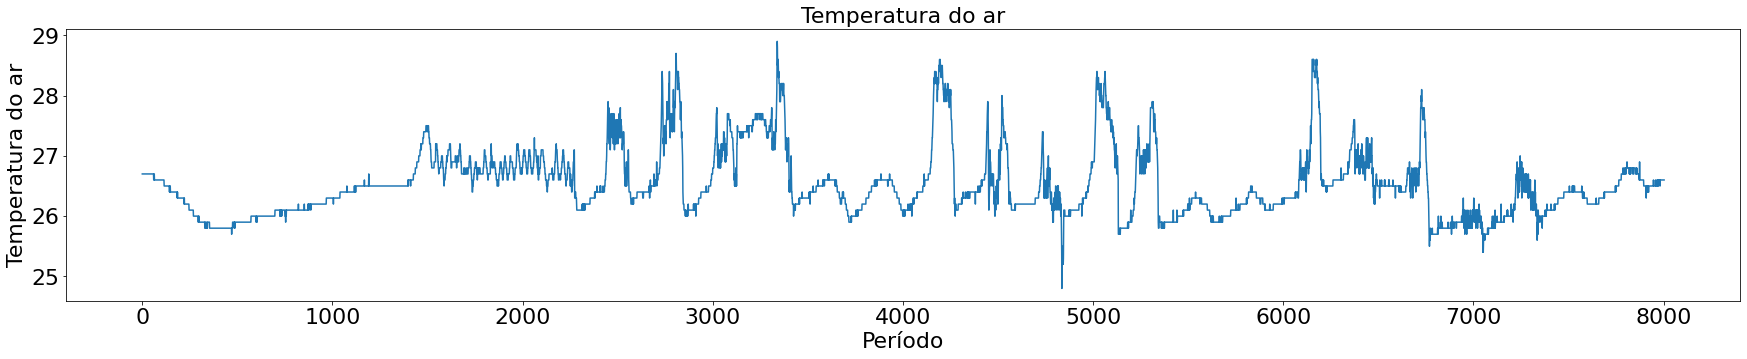

CPU times: user 433 ms, sys: 90.6 ms, total: 524 ms
Wall time: 439 ms


In [65]:
%%time
plt.figure(figsize=(30,5))
serie.temp_ar.plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Temperatura do ar',size=22)
plt.title('Temperatura do ar',size=22)

plt.savefig('data_temp_ar_conjunto_tratado_original.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

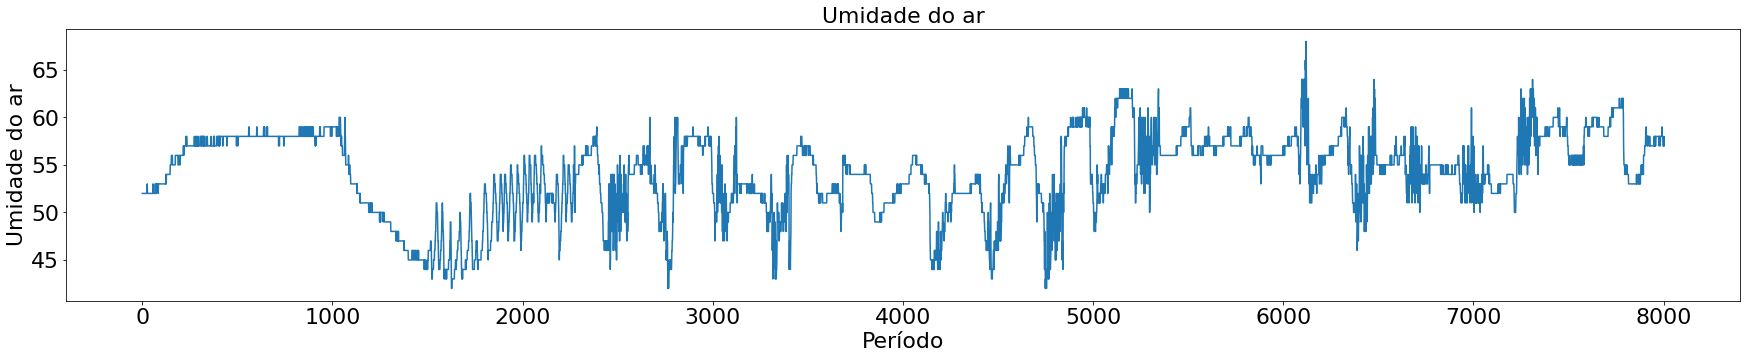

CPU times: user 612 ms, sys: 48.7 ms, total: 661 ms
Wall time: 648 ms


In [66]:
%%time
plt.figure(figsize=(30,5))
serie.umid_ar.plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Umidade do ar',size=22)
plt.title('Umidade do ar',size=22)

plt.savefig('data_umidade_ar_conjunto_tratado_original.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

# Agrupando dados a cada t minuto(s) utilizando a média

Definindo os minutos

In [67]:
minutos = 30

Setando a data como index

In [68]:
serie.set_index('data', inplace=True)

In [69]:
serie

,temp_ar,umid_ar
data,,
2023-03-25 10:50:14,26.70,52.00
2023-03-25 10:49:32,26.70,52.00
2023-03-25 10:48:50,26.70,52.00
2023-03-25 10:48:08,26.70,52.00
2023-03-25 10:47:26,26.70,52.00
...,...,...
2023-03-04 00:24:21,26.60,57.00
2023-03-04 00:19:18,26.60,57.00
2023-03-04 00:14:16,26.60,57.00


Agrupando os valores de data para cada t minuto(s) pela média

In [70]:
%%time
dados_agrupados_minutos = serie.resample(str(minutos) + 'T').mean()
dados_agrupados_minutos.head()

CPU times: user 379 ms, sys: 0 ns, total: 379 ms
Wall time: 396 ms


,temp_ar,umid_ar
data,,
2023-03-04 00:00:00,26.60,57.17
2023-03-04 00:30:00,26.60,58.00
2023-03-04 01:00:00,26.60,58.00
2023-03-04 01:30:00,26.58,57.60
2023-03-04 02:00:00,26.60,57.83


Tamanho do conjunto gerado

In [71]:
dados_agrupados_minutos.shape

(1030, 2)

Verificando nulos

In [72]:
dados_agrupados_minutos.isnull().sum()

temp_ar    11
umid_ar    11
dtype: int64

Preenchendo nulos com os valores anteriores

In [73]:
dados_agrupados_minutos.fillna(method="ffill", inplace = True)

Verificando novamente os nulos

In [74]:
dados_agrupados_minutos.isnull().sum()

temp_ar    0
umid_ar    0
dtype: int64

# Gráficos

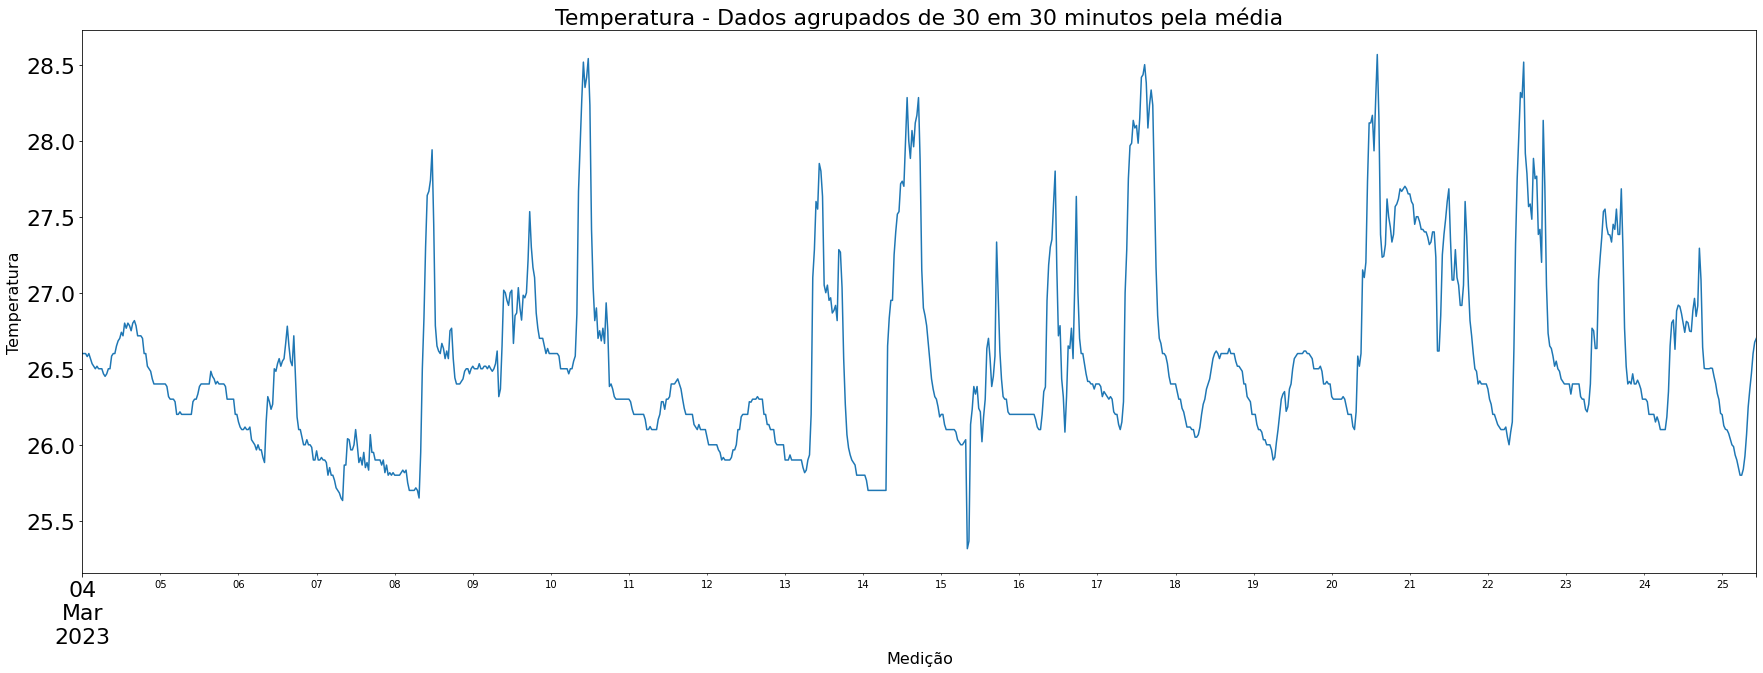

CPU times: user 686 ms, sys: 111 ms, total: 798 ms
Wall time: 688 ms


In [75]:
%%time
plt.figure(figsize=(30,10))
dados_agrupados_minutos['temp_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=16)
plt.ylabel('Temperatura',size=16)
plt.title(f'Temperatura - Dados agrupados de {minutos} em {minutos} minutos pela média',size=22)

plt.savefig(f'data_temperatura_ar_conjunto_dados_agrupados_{minutos}_minutos.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

plt.show()

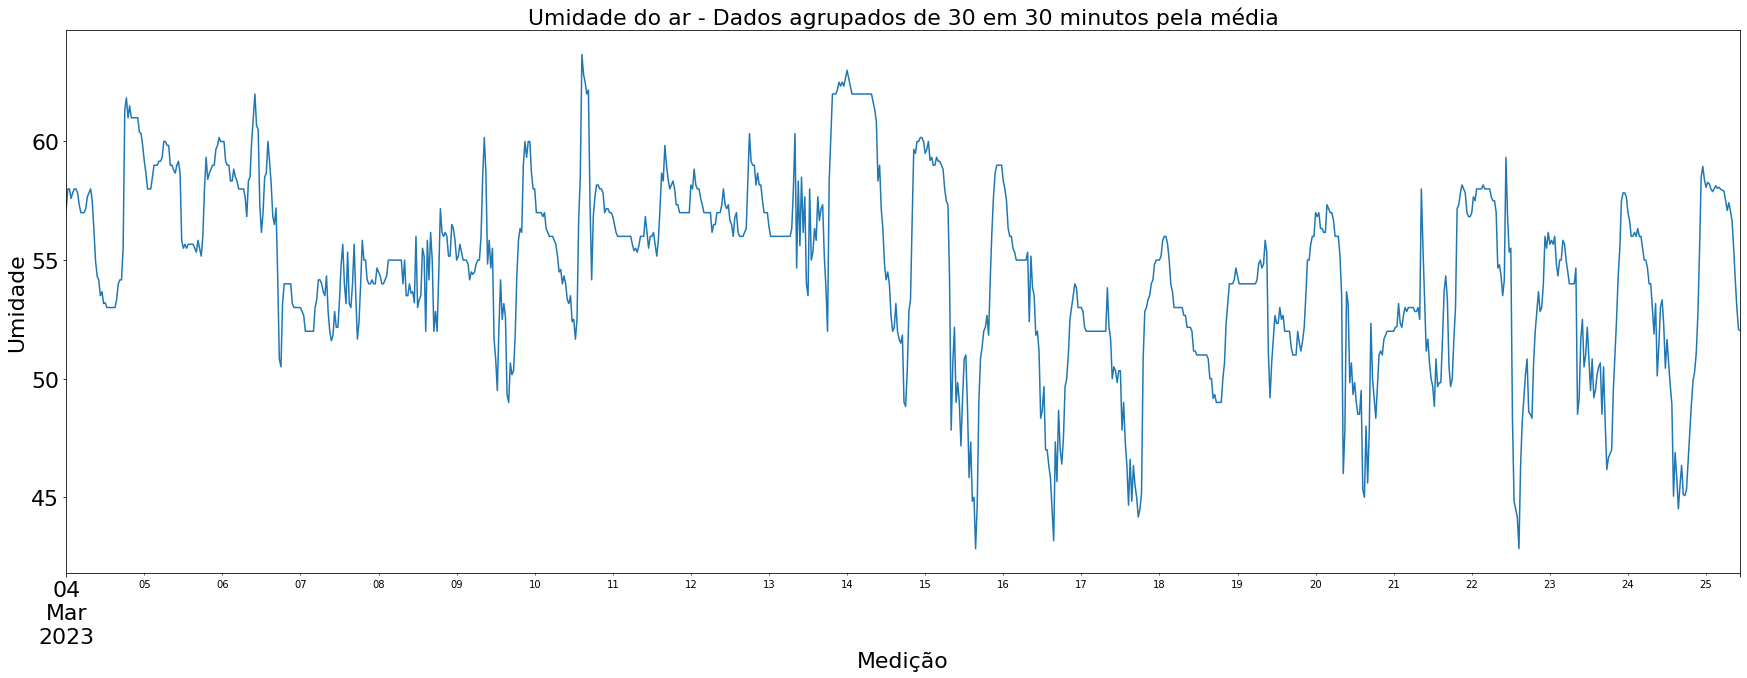

CPU times: user 1.22 s, sys: 48.1 ms, total: 1.26 s
Wall time: 1.79 s


In [76]:
%%time
plt.figure(figsize=(30,10))
dados_agrupados_minutos['umid_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=22)
plt.ylabel('Umidade',size=22)
plt.title(f'Umidade do ar - Dados agrupados de {minutos} em {minutos} minutos pela média',size=22)

plt.savefig(f'data_umidade_ar_conjunto_dados_agrupados_{minutos}_minutos.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

plt.show()